In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv(os.path.join(dirname, filenames[0]))
test_df = pd.read_csv(os.path.join(dirname, filenames[1]))

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_df[pd.isna(train_df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
train_df[pd.isna(train_df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Categorical: sex, cabin, embarked

Age, Fare: normalize/standardize

Drop: passenger id, name, ticket, Cabin

Cabin: replace Nan with default eg 0

Embarked: replace nan?

Age: replace nan?


In [8]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
train_df['Cabin Code'] = train_df['Cabin'].str[0]
train_df['Cabin Code'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
train_df['Cabin Code'].fillna('Z', inplace=True)
train_df['Cabin Code'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
train_df.replace(to_replace="male", value=1, inplace=True)
train_df.replace(to_replace="female", value=0, inplace=True)

In [13]:
train_df.drop(columns = ['Name','Ticket'], inplace = True)
train_df.set_index('PassengerId', inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Code
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,NaN,S,Z
2,1,1,0,38.0,1,0,71.2833,C85,C,C
3,1,3,0,26.0,0,0,7.9250,NaN,S,Z
4,1,1,0,35.0,1,0,53.1000,C123,S,C
5,0,3,1,35.0,0,0,8.0500,NaN,S,Z


In [14]:
train_df.loc[train_df['Cabin Code'] == 'T']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin Code
PassengerId,,,,,,,,,,
340,0,1,1,45.0,0,0,35.5,T,S,T


In [15]:
train_df.drop(columns = ['Cabin','Cabin Code'], inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
ohe = OneHotEncoder(drop = 'first')


OHE Plass and embarked

standardize/normalize age and fare 

fare and pclass (high correlation? consider removing fare?)

In [17]:
train_df.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

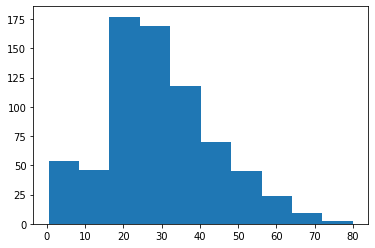

In [18]:
import matplotlib.pyplot as plt
plt.hist(train_df['Age'])

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
age_imputed = imputer.fit_transform(train_df[['Age']])

train_df['Age Imp'] =  age_imputed

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

In [21]:
train_df[['Fare','Age Imp']] = mm.fit_transform(train_df[['Fare','Age Imp']])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,0.014151,S,0.271174
2,1,1,0,38.0,1,0,0.139136,C,0.472229
3,1,3,0,26.0,0,0,0.015469,S,0.321438
4,1,1,0,35.0,1,0,0.103644,S,0.434531
5,0,3,1,35.0,0,0,0.015713,S,0.434531


In [22]:
pclass_ohe = ohe.fit_transform(train_df[['Pclass']])
print(pclass_ohe.toarray())

[[0. 1.]
 [0. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 0.]
 [0. 1.]]


In [23]:
print(ohe.categories_)

[array([1, 2, 3])]


In [24]:
train_df[['P2','P3']] = pclass_ohe.toarray()
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp,P2,P3
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,0.014151,S,0.271174,0.0,1.0
2,1,1,0,38.0,1,0,0.139136,C,0.472229,0.0,0.0
3,1,3,0,26.0,0,0,0.015469,S,0.321438,0.0,1.0
4,1,1,0,35.0,1,0,0.103644,S,0.434531,0.0,0.0
5,0,3,1,35.0,0,0,0.015713,S,0.434531,0.0,1.0


In [25]:
ohe2 = OneHotEncoder(drop = 'if_binary')
emb_ohe = ohe2.fit_transform(train_df[['Embarked']])
print(emb_ohe.toarray())

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [26]:
print(ohe.categories_)

[array([1, 2, 3])]


In [27]:
train_df[['Emb C','Emb Q','Emb S']] = emb_ohe.toarray()[:,0:3]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp,P2,P3,Emb C,Emb Q,Emb S
PassengerId,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,0.014151,S,0.271174,0.0,1.0,0.0,0.0,1.0
2,1,1,0,38.0,1,0,0.139136,C,0.472229,0.0,0.0,1.0,0.0,0.0
3,1,3,0,26.0,0,0,0.015469,S,0.321438,0.0,1.0,0.0,0.0,1.0
4,1,1,0,35.0,1,0,0.103644,S,0.434531,0.0,0.0,0.0,0.0,1.0
5,0,3,1,35.0,0,0,0.015713,S,0.434531,0.0,1.0,0.0,0.0,1.0


In [28]:
train_df.drop(columns = ['Pclass','Embarked'], inplace = True)
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Age Imp,P2,P3,Emb C,Emb Q,Emb S
PassengerId,,,,,,,,,,,,
1,0,1,22.0,1,0,0.014151,0.271174,0.0,1.0,0.0,0.0,1.0
2,1,0,38.0,1,0,0.139136,0.472229,0.0,0.0,1.0,0.0,0.0
3,1,0,26.0,0,0,0.015469,0.321438,0.0,1.0,0.0,0.0,1.0
4,1,0,35.0,1,0,0.103644,0.434531,0.0,0.0,0.0,0.0,1.0
5,0,1,35.0,0,0,0.015713,0.434531,0.0,1.0,0.0,0.0,1.0


In [29]:
x = train_df.drop(columns = ['Survived','Age'])
y = train_df['Survived']

visualize the feature distribution

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

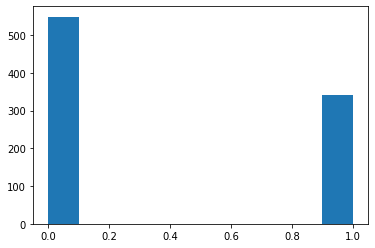

In [30]:
plt.hist(y)

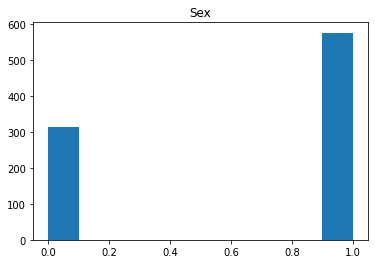

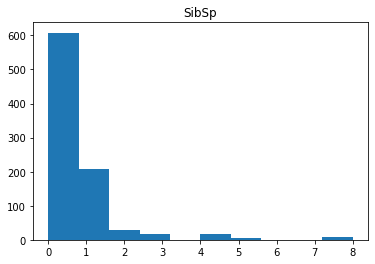

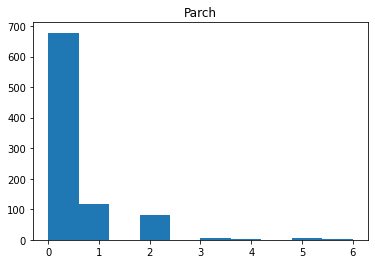

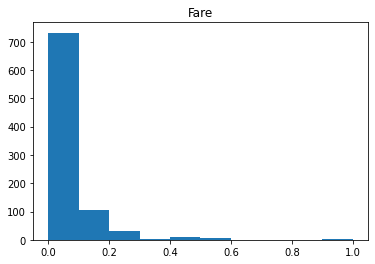

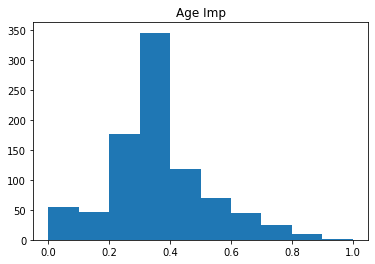

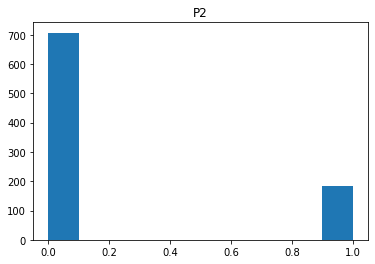

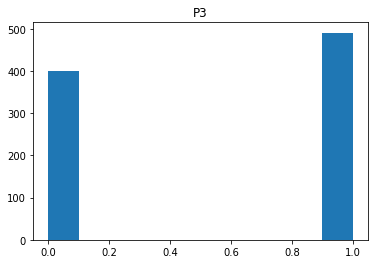

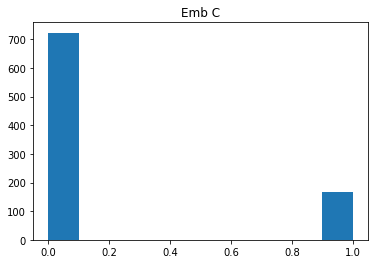

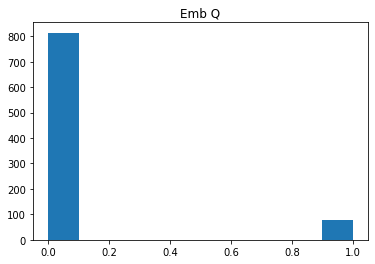

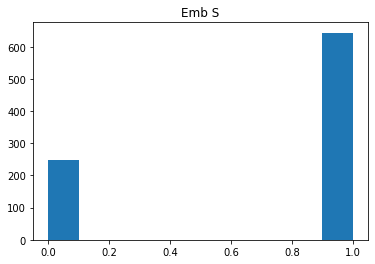

In [31]:
for name in x.columns:
    plt.hist(x[name])
    plt.title(name)
    plt.show()

stratified split

k-fold cross validation

hyperparameter tuning

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

In [33]:
skf = StratifiedKFold(n_splits=5)
MLmodel = LogisticRegression()

In [34]:
fold_no =1
for train_index, test_index in skf.split(x, y):
    test = y.iloc[test_index]
    print(fold_no, sum(test)/len(test))
    
    fold_no += 1

1 0.3854748603351955
2 0.38202247191011235
3 0.38202247191011235
4 0.38202247191011235
5 0.38764044943820225


In [35]:
fold_no = 1

def train_model(train_index, test_index, fold_no):
   X_train = x.iloc[train_index]
   y_train = y.iloc[train_index]
   X_test = x.iloc[test_index]
   y_test = y.iloc[test_index]
   MLmodel.fit(X_train,y_train)
   predictions = MLmodel.predict(X_test)
   print('Fold',str(fold_no), '\n', 
         'Accuracy:', accuracy_score(y_test,predictions),'\n',
        'Presicion:', precision_score(y_test,predictions),'\n',
        'F1 Score:',f1_score(y_test,predictions),'\n',
        'CM', confusion_matrix(y_test,predictions),'\n',
          'Columns',X_train.columns, '\n',
        'Coeffs:', MLmodel.coef_)


for train_index, test_index in skf.split(x, y):
    train_model(train_index,test_index,fold_no)
    fold_no += 1


Fold 1 
 Accuracy: 0.7932960893854749 
 Presicion: 0.7424242424242424 
 F1 Score: 0.725925925925926 
 CM [[93 17]
 [20 49]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3', 'Emb C',
       'Emb Q', 'Emb S'],
      dtype='object') 
 Coeffs: [[-2.46586924 -0.18345062 -0.11312338  0.88860998 -1.91667183 -0.80980294
  -1.95139928  0.30776819 -0.12461493 -0.31882636]]
Fold 2 
 Accuracy: 0.8033707865168539 
 Presicion: 0.7704918032786885 
 F1 Score: 0.7286821705426356 
 CM [[96 14]
 [21 47]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3', 'Emb C',
       'Emb Q', 'Emb S'],
      dtype='object') 
 Coeffs: [[-2.66128238 -0.37088076 -0.07667898  0.40502099 -1.97948428 -0.68596854
  -2.06437183  0.23748418 -0.09532155 -0.325289  ]]
Fold 3 
 Accuracy: 0.7865168539325843 
 Presicion: 0.7205882352941176 
 F1 Score: 0.7205882352941176 
 CM [[91 19]
 [19 49]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3', 'Emb C',
       'Emb 

In [36]:
x2 = x.drop(columns = ['Emb C', 'Emb Q', 'Emb S'])

def train_model(train_index, test_index, fold_no):
   X_train = x2.iloc[train_index]
   y_train = y.iloc[train_index]
   X_test = x2.iloc[test_index]
   y_test = y.iloc[test_index]
   MLmodel.fit(X_train,y_train)
   predictions = MLmodel.predict(X_test)
   print('Fold',str(fold_no), '\n', 
         'Accuracy:', accuracy_score(y_test,predictions),'\n',
        'Presicion:', precision_score(y_test,predictions),'\n',
        'F1 Score:',f1_score(y_test,predictions),'\n',
        'CM', confusion_matrix(y_test,predictions),'\n',
         'Columns',X_train.columns, '\n',
        'Coeffs:', MLmodel.coef_)

fold_no = 1
for train_index, test_index in skf.split(x, y):
    train_model(train_index,test_index,fold_no)
    fold_no += 1

Fold 1 
 Accuracy: 0.7988826815642458 
 Presicion: 0.746268656716418 
 F1 Score: 0.7352941176470589 
 CM [[93 17]
 [19 50]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.48195288 -0.20453041 -0.11151156  1.09186695 -1.9825707  -0.94972604
  -2.0230496 ]]
Fold 2 
 Accuracy: 0.7752808988764045 
 Presicion: 0.7058823529411765 
 F1 Score: 0.7058823529411765 
 CM [[90 20]
 [20 48]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.6823981  -0.3959999  -0.07942299  0.60513037 -2.04224904 -0.82624839
  -2.13356586]]
Fold 3 
 Accuracy: 0.7752808988764045 
 Presicion: 0.7121212121212122 
 F1 Score: 0.7014925373134329 
 CM [[91 19]
 [21 47]] 
 Columns Index(['Sex', 'SibSp', 'Parch', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.57947156 -0.29655073 -0.08283918  1.18503079 -2.19641574 -0.8404915
  -1.79379776]]
Fold 4 
 Accuracy: 0.7752808988764045 
 Presicion: 0.75 


In [37]:
x2 = x.drop(columns = ['Emb C', 'Emb Q', 'Emb S','SibSp', 'Parch'])

def train_model(train_index, test_index, fold_no):
   X_train = x2.iloc[train_index]
   y_train = y.iloc[train_index]
   X_test = x2.iloc[test_index]
   y_test = y.iloc[test_index]
   MLmodel.fit(X_train,y_train)
   predictions = MLmodel.predict(X_test)
   print('Fold',str(fold_no), '\n', 
         'Accuracy:', accuracy_score(y_test,predictions),'\n',
        'Presicion:', precision_score(y_test,predictions),'\n',
        'F1 Score:',f1_score(y_test,predictions),'\n',
        'CM', confusion_matrix(y_test,predictions),'\n',
         'Columns',X_train.columns, '\n',
        'Coeffs:', MLmodel.coef_)

fold_no = 1
for train_index, test_index in skf.split(x, y):
    train_model(train_index,test_index,fold_no)
    fold_no += 1

Fold 1 
 Accuracy: 0.7988826815642458 
 Presicion: 0.7391304347826086 
 F1 Score: 0.7391304347826085 
 CM [[92 18]
 [18 51]] 
 Columns Index(['Sex', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.36658951  0.77959024 -1.79114559 -0.95786608 -2.07675175]]
Fold 2 
 Accuracy: 0.8202247191011236 
 Presicion: 0.78125 
 F1 Score: 0.7575757575757576 
 CM [[96 14]
 [18 50]] 
 Columns Index(['Sex', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.49572138  0.18277133 -1.66023219 -0.83557037 -2.16895819]]
Fold 3 
 Accuracy: 0.7696629213483146 
 Presicion: 0.7014925373134329 
 F1 Score: 0.6962962962962963 
 CM [[90 20]
 [21 47]] 
 Columns Index(['Sex', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 
 Coeffs: [[-2.44680827  0.77456474 -1.87489004 -0.83894677 -1.86969827]]
Fold 4 
 Accuracy: 0.7528089887640449 
 Presicion: 0.7142857142857143 
 F1 Score: 0.6451612903225806 
 CM [[94 16]
 [28 40]] 
 Columns Index(['Sex', 'Fare', 'Age Imp', 'P2', 'P3'], dtype='object') 


Test Data

In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Drop Name, Cabin, Ticket

OHE Pclass, Sex and Embarked

Impute Age

Scale Age, Fare

ID to Index

In [39]:
test_df.drop(columns = ['Name', 'Cabin', 'Ticket'], inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [40]:
test_df.replace(to_replace="male", value=1, inplace=True)
test_df.replace(to_replace="female", value=0, inplace=True)
test_df.set_index('PassengerId', inplace = True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,Q
893,3,0,47.0,1,0,7.0000,S
894,2,1,62.0,0,0,9.6875,Q
895,3,1,27.0,0,0,8.6625,S
896,3,0,22.0,1,1,12.2875,S


In [41]:
age_imputed = imputer.transform(test_df[['Age']])
test_df['Age Imp'] =  age_imputed

test_df[['Fare','Age Imp']] = mm.transform(test_df[['Fare','Age Imp']])
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp
PassengerId,,,,,,,,
892,3,1,34.5,0,0,0.015282,Q,0.428248
893,3,0,47.0,1,0,0.013663,S,0.585323
894,2,1,62.0,0,0,0.018909,Q,0.773813
895,3,1,27.0,0,0,0.016908,S,0.334004
896,3,0,22.0,1,1,0.023984,S,0.271174


In [42]:
pclass_ohe = ohe.transform(test_df[['Pclass']])
test_df[['P2','P3']] = pclass_ohe.toarray()
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp,P2,P3
PassengerId,,,,,,,,,,
892,3,1,34.5,0,0,0.015282,Q,0.428248,0.0,1.0
893,3,0,47.0,1,0,0.013663,S,0.585323,0.0,1.0
894,2,1,62.0,0,0,0.018909,Q,0.773813,1.0,0.0
895,3,1,27.0,0,0,0.016908,S,0.334004,0.0,1.0
896,3,0,22.0,1,1,0.023984,S,0.271174,0.0,1.0


In [43]:
emb_ohe = ohe2.transform(test_df[['Embarked']])
test_df[['Emb C','Emb Q','Emb S']] = emb_ohe.toarray()[:,0:3]
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Imp,P2,P3,Emb C,Emb Q,Emb S
PassengerId,,,,,,,,,,,,,
892,3,1,34.5,0,0,0.015282,Q,0.428248,0.0,1.0,0.0,1.0,0.0
893,3,0,47.0,1,0,0.013663,S,0.585323,0.0,1.0,0.0,0.0,1.0
894,2,1,62.0,0,0,0.018909,Q,0.773813,1.0,0.0,0.0,1.0,0.0
895,3,1,27.0,0,0,0.016908,S,0.334004,0.0,1.0,0.0,0.0,1.0
896,3,0,22.0,1,1,0.023984,S,0.271174,0.0,1.0,0.0,0.0,1.0


In [44]:
test_df.drop(columns = ['Pclass','Embarked','Age'], inplace = True)

In [45]:
test_df.head()

,Sex,SibSp,Parch,Fare,Age Imp,P2,P3,Emb C,Emb Q,Emb S
PassengerId,,,,,,,,,,
892,1,0,0,0.015282,0.428248,0.0,1.0,0.0,1.0,0.0
893,0,1,0,0.013663,0.585323,0.0,1.0,0.0,0.0,1.0
894,1,0,0,0.018909,0.773813,1.0,0.0,0.0,1.0,0.0
895,1,0,0,0.016908,0.334004,0.0,1.0,0.0,0.0,1.0
896,0,1,1,0.023984,0.271174,0.0,1.0,0.0,0.0,1.0
